In [1]:
import repath.data.datasets.tissue as tissue
from repath.preprocess.patching import GridPatchFinder, SlidesIndex, CombinedIndex
from repath.preprocess.tissue_detection import TissueDetector, TissueDetectorGreyScale, TissueDetectorAll, TissueDetectorOTSU
from repath.utils.metrics import conf_mat_plot_heatmap
from repath.utils.paths import project_root
from repath.utils.seeds import set_seed

"""
Global stuff
"""
experiment_name = "tissue"
experiment_root = project_root() / "experiments" / experiment_name

global_seed = 123

In [2]:
set_seed(global_seed)
tissue_dataset = tissue.tissue()



In [3]:
tissue_dataset[0]

(PosixPath('/home/ubuntu/repath/data/icaird_tissue/images/IC-CX-00001-01.isyntax'),
 PosixPath('/home/ubuntu/repath/data/icaird_tissue/annotations/IC-CX-00001-01.tiff.txt'),
 'cervical',
 '')

In [4]:
slide_path = tissue_dataset[1][0]
slide_path

PosixPath('/home/ubuntu/repath/data/icaird_tissue/images/IC-CX-00002-01.isyntax')

In [5]:
from repath.data.slides.isyntax import Slide

with Slide(slide_path, 0) as slide:
    thumb = slide.get_thumbnail(6)

[0, 42112, 0, 46208, 6]
Processing region 0


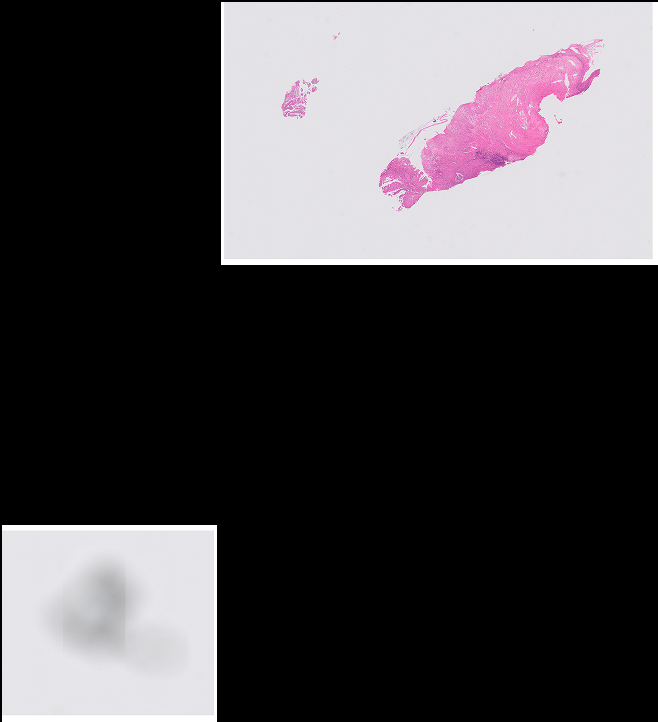

In [6]:
from PIL import Image
Image.fromarray(thumb)

In [7]:
annotation_path = tissue_dataset[1][1]
annotation_path

PosixPath('/home/ubuntu/repath/data/icaird_tissue/annotations/IC-CX-00002-01.tiff.txt')

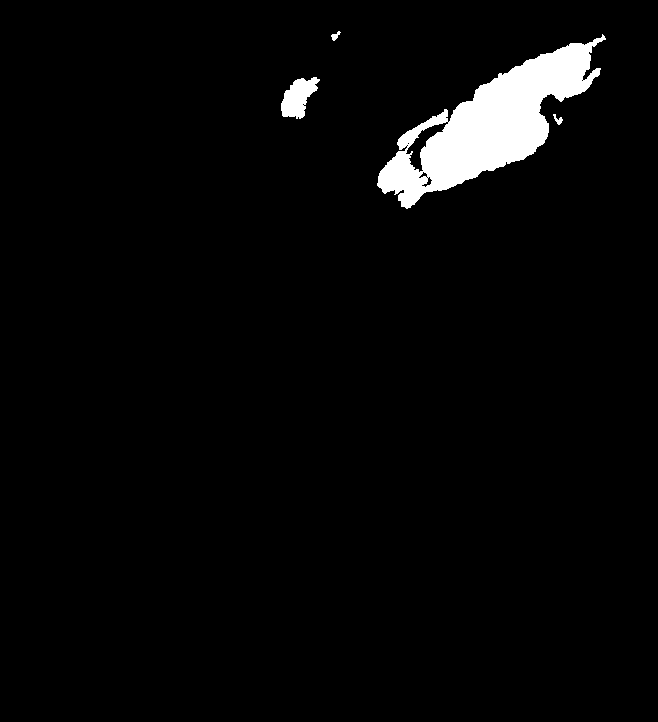

In [8]:
import numpy as np
from repath.utils.convert import np_to_pil

annotations = tissue_dataset.load_annotations(annotation_path).render((thumb.shape[0], thumb.shape[1]), 2**6)

Image.fromarray(np.array(annotations*255, dtype=np.uint8))

In [9]:
annot_mask = np.array(annotations, dtype=np.bool)
annot_mask = np.expand_dims(annot_mask, axis=-1)
thumb_masked = np.where(annot_mask, thumb, 0)
thumb_inverse = np.where(np.logical_not(annot_mask), thumb, 0)

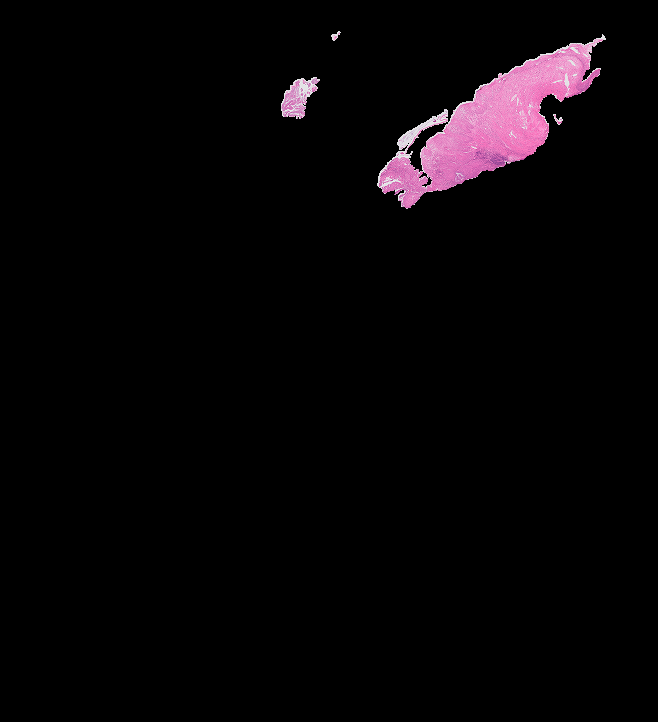

In [10]:
Image.fromarray(thumb_masked)

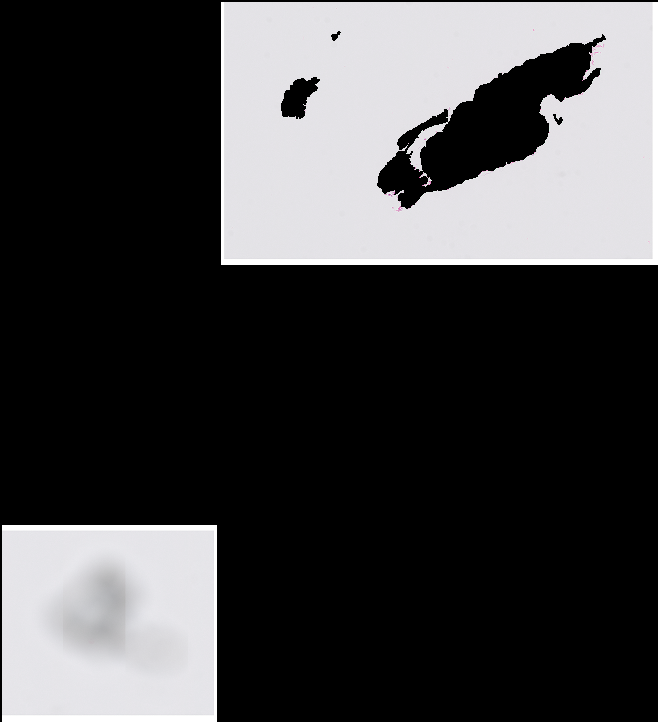

In [11]:
Image.fromarray(thumb_inverse)

In [12]:
level_in = 6
psize = 2 ** level_in
patch_finder = GridPatchFinder(labels_level=level_in, patch_level=0, patch_size=psize, stride=psize, remove_background=False)
# The tissue detector is applied over the top of the patch finder
# tissue detector all classes everything as foreground so will not change the foreground background labels from the annotations
tissue_detector_all = TissueDetectorAll()
tissue_patchsets_labelled = SlidesIndex.index_dataset(tissue_dataset, tissue_detector_all, patch_finder)
tissue_patches_labelled = CombinedIndex.for_slide_indexes([tissue_patchsets_labelled])

indexing IC-CX-00001-01.isyntax
[0, 21632, 0, 54784, 6]
Processing region 0
indexing IC-CX-00002-01.isyntax
[0, 42112, 0, 46208, 6]
Processing region 0
indexing IC-CX-00004-01.isyntax
[0, 50304, 0, 25728, 6]
Processing region 0
indexing IC-CX-00005-01.isyntax
[0, 76160, 0, 91520, 6]
Processing region 0
indexing IC-CX-00006-02.isyntax
[0, 16160, 0, 13088, 4]
Processing region 0


ValueError: cannot resize this array: it does not own its data